In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
def get_pca(X):
    """
    Transform data to 2D points for plotting. Should return an array with shape (n, 2).
    """
    flatten_model = make_pipeline(
        MinMaxScaler(),
        PCA(2)
    )
    X2 = flatten_model.fit_transform(X)
    assert X2.shape == (X.shape[0], 2)
    return X2

In [3]:
def get_clusters(X):
    """
    Find clusters of the weather data.
    """
    model = make_pipeline(
        KMeans(n_clusters=9)
    )
    model.fit(X)
    return model.predict(X)

In [4]:
# read dataset
month_lab = pd.read_csv('monthly-data-labelled.csv')
# separate features and target in df: X, y 
X = month_lab.loc[:, month_lab.columns != 'city']
y = month_lab['city']

In [5]:
# use principal component analysis to get two-dimensional data
X2 = get_pca(X)
X2

array([[-1.3324929 ,  0.41309516],
       [-1.51089768,  0.39093481],
       [-1.32334036,  0.47640005],
       ...,
       [-0.64965788, -0.35164162],
       [-0.6076373 , -0.49979801],
       [-0.77657589, -0.43552391]])

In [6]:
# use a clustering technique to find observations with similar weather
clusters = get_clusters(X)

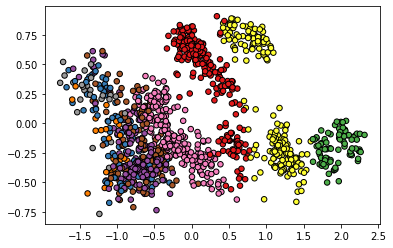

In [7]:
# plot scatter-plot of the clusters
plt.scatter(X2[:, 0], X2[:, 1], c=clusters, cmap='Set1', edgecolor='k', s=30)
plt.savefig('clusters.png')

In [8]:
# print a table of how many observations from each city were put into each category 
df = pd.DataFrame({
    'cluster': clusters,
    'city': y,
})
counts = pd.crosstab(df['city'], df['cluster'])
print(counts)

cluster          0   1   2   3   4   5   6   7   8
city                                              
Anchorage        0  18   0  12   4   0   4   0  18
Atlanta          0   0   0   0   0  47   0   0   0
Atlantic City   38   0   0   0   0   7   0   0   0
Calgary          1   0   0   9   0   0   2  40   0
Chicago          4   0   0   0   0   0   1  47   0
Denver           7   0   0   0   0   1   0   1   0
Edmonton         0   9   0  20   0   0  15   4   3
Gander           0  19   0   1   9   0  13   2   7
Halifax          0   0   0   0   0   0  12  38   0
London           0   0   0   0   0   0   4  38   0
Los Angeles      0   0   0   0   0  39   0   0   0
Miami            0   0  43   0   0   0   0   0   0
Montreal         0   7   0   2   2   0  14   1   2
New Orleans      0   0  45   0   0   0   0   0   0
Ottawa           0  10   0   7   2   0  23   6   3
Portland        35   0   0   0   0   3   0   0   0
Québec           0  10   0   0  23   0   0   0   2
Raleigh Durham   0   0   0   0 